In [16]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import Callback

In [17]:
# Initializing XOR input and output
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([[0], [1], [1], [0]])

In [18]:
# Creating the neural network model
def create_model(lr, momentum=0.0):
    model = Sequential()
    model.add(Dense(8, input_dim=2, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    optimizer = SGD(learning_rate=lr, momentum=momentum)
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

In [19]:
class LearningRateLogger(Callback):
    def __init__(self, lr_list):
        self.lr_list = lr_list

    def on_epoch_end(self, epoch, logs=None):
        self.lr_list.append(float(tf.keras.backend.get_value(self.model.optimizer.learning_rate)))

In [20]:
losses = []
learning_rates = []
converged = False
target_loss = 0.001
epochs_done = 0
lr = 0.1
model = create_model(lr)
lr_callback = LearningRateLogger(learning_rates)

while not converged:
    history = model.fit(X, y, epochs=10, verbose=0, callbacks=[lr_callback])
    loss = history.history['loss'][-1]
    losses.append(loss)
    epochs_done += 10
    if loss < target_loss:
        converged = True

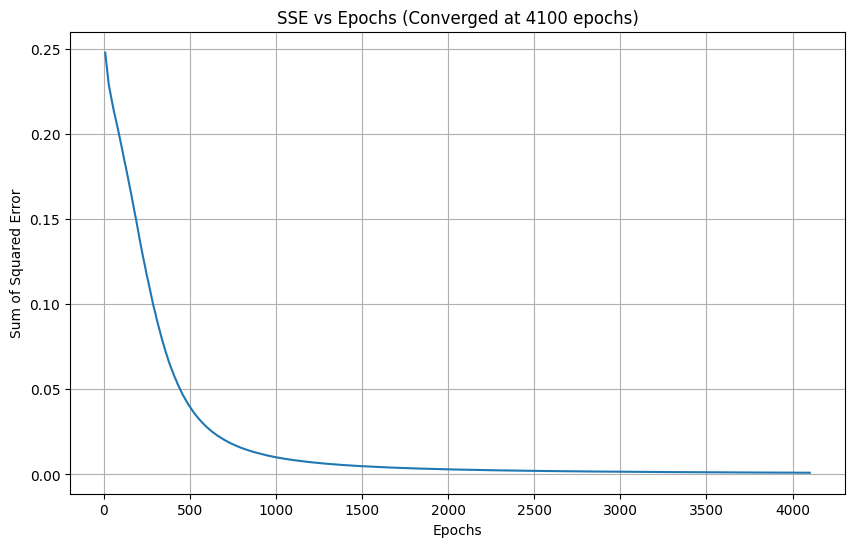

In [21]:
plt.figure(figsize = (10,6))
plt.plot(np.arange(10, epochs_done + 1, 10), losses)
plt.title(f"SSE vs Epochs (Converged at {epochs_done} epochs)")
plt.xlabel("Epochs")
plt.ylabel("Sum of Squared Error")
plt.grid(True)

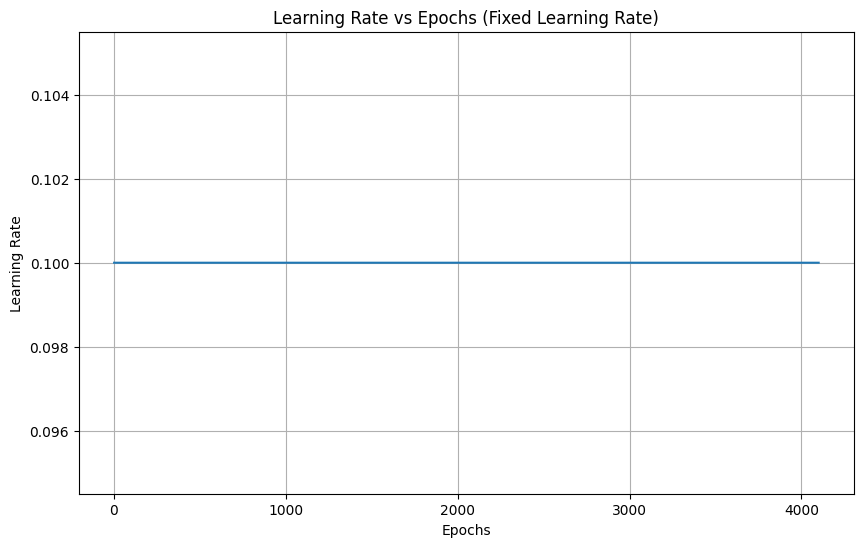

In [22]:
plt.figure(figsize = (10,6))
plt.plot(range(1, len(learning_rates)+1), learning_rates)
plt.title("Learning Rate vs Epochs (Fixed Learning Rate)")
plt.xlabel("Epochs")
plt.ylabel("Learning Rate")
plt.grid(True)

Re-training the model again using momentum as an additional term

In [23]:
# Momentum-Based Learning
losses_mom = []
learning_rates_mom = []
converged = False
lr = 0.1
momentum = 0.9
epochs_done = 0
model = create_model(lr, momentum)
lr_callback = LearningRateLogger(learning_rates_mom)

while not converged:
    history = model.fit(X, y, epochs=10, verbose=0, callbacks=[lr_callback])
    loss = history.history['loss'][-1]
    losses_mom.append(loss)
    epochs_done += 10
    if loss < target_loss:
        converged = True

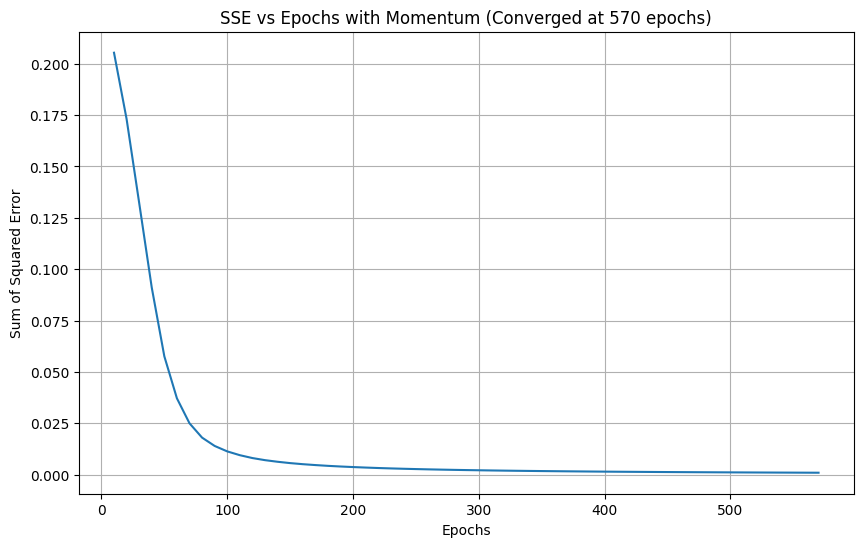

In [24]:
plt.figure(figsize = (10,6))
plt.plot(np.arange(10, epochs_done + 1, 10), losses_mom)
plt.title(f"SSE vs Epochs with Momentum (Converged at {epochs_done} epochs)")
plt.xlabel("Epochs")
plt.ylabel("Sum of Squared Error")
plt.grid(True)

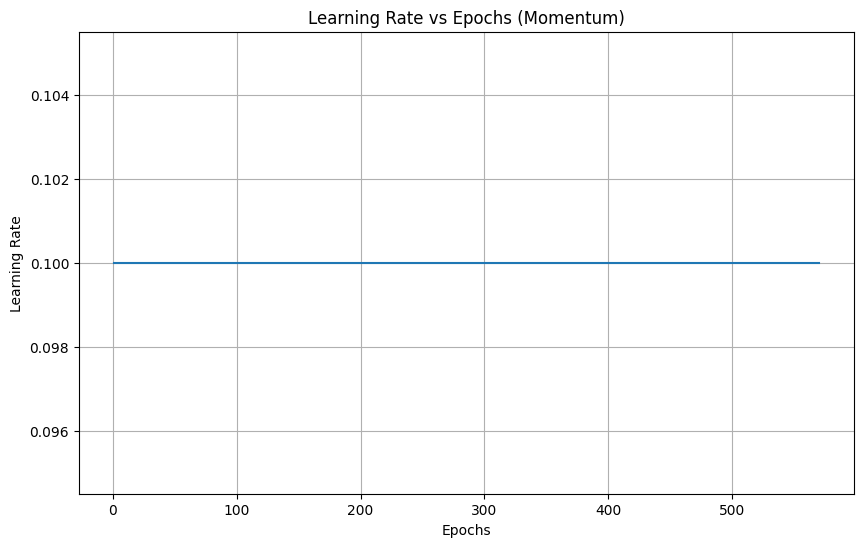

In [25]:
plt.figure(figsize = (10,6))
plt.plot(range(1, len(learning_rates_mom)+1), learning_rates_mom)
plt.title("Learning Rate vs Epochs (Momentum)")
plt.xlabel("Epochs")
plt.ylabel("Learning Rate")
plt.grid(True)

In [26]:
# Adaptive Learning Rate
initial_lr = 0.1
current_lr = initial_lr
losses_adapt = []
learning_rates_adapt = []
converged = False
epochs_done = 0
target_loss = 0.001
prev_loss = float('inf')

model = create_model(lr=current_lr)
lr_tracker = LearningRateLogger(learning_rates_adapt)

while not converged:
    history = model.fit(X, y, epochs=5, verbose=0, callbacks=[lr_tracker])
    loss = history.history['loss'][-1]
    losses_adapt.append(loss)
    epochs_done += 5

    if loss > 1.04 * prev_loss:
        current_lr *= 0.7
    elif loss < prev_loss:
        current_lr *= 1.05

    model.optimizer.learning_rate.assign(current_lr)
    prev_loss = loss

    if loss <= target_loss:
        converged = True

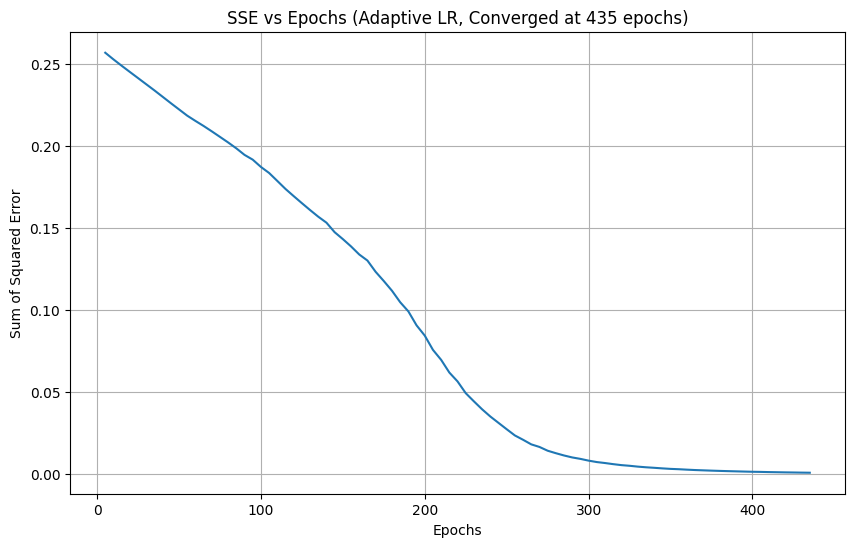

In [27]:
plt.figure(figsize = (10,6))
plt.plot(np.arange(5, epochs_done + 1, 5), losses_adapt)
plt.title(f"SSE vs Epochs (Adaptive LR, Converged at {epochs_done} epochs)")
plt.xlabel("Epochs")
plt.ylabel("Sum of Squared Error")
plt.grid(True)

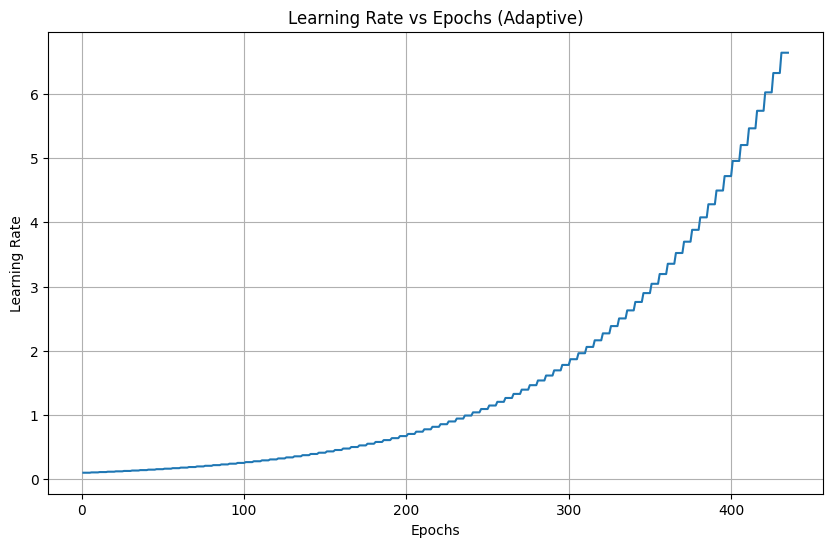

In [28]:
plt.figure(figsize = (10,6))
plt.plot(range(1, len(learning_rates_adapt)+1), learning_rates_adapt)
plt.title("Learning Rate vs Epochs (Adaptive)")
plt.xlabel("Epochs")
plt.ylabel("Learning Rate")
plt.grid(True)

In [29]:
# Adaptive Learning Rate + Momentum

initial_lr = 0.1
current_lr = initial_lr
momentum = 0.9
losses_adapt_mom = []
learning_rates_adapt_mom = []
converged = False
epochs_done = 0
target_loss = 0.001
prev_loss = float('inf')

model = create_model(lr=current_lr, momentum=momentum)
lr_tracker = LearningRateLogger(learning_rates_adapt_mom)

while not converged:
    history = model.fit(X, y, epochs=5, verbose=0, callbacks=[lr_tracker])
    loss = history.history['loss'][-1]
    losses_adapt_mom.append(loss)
    epochs_done += 5

    if loss > 1.04 * prev_loss:
        current_lr *= 0.7
    elif loss < prev_loss:
        current_lr *= 1.05

    model.optimizer.learning_rate.assign(current_lr)
    prev_loss = loss

    if loss <= target_loss:
        converged = True


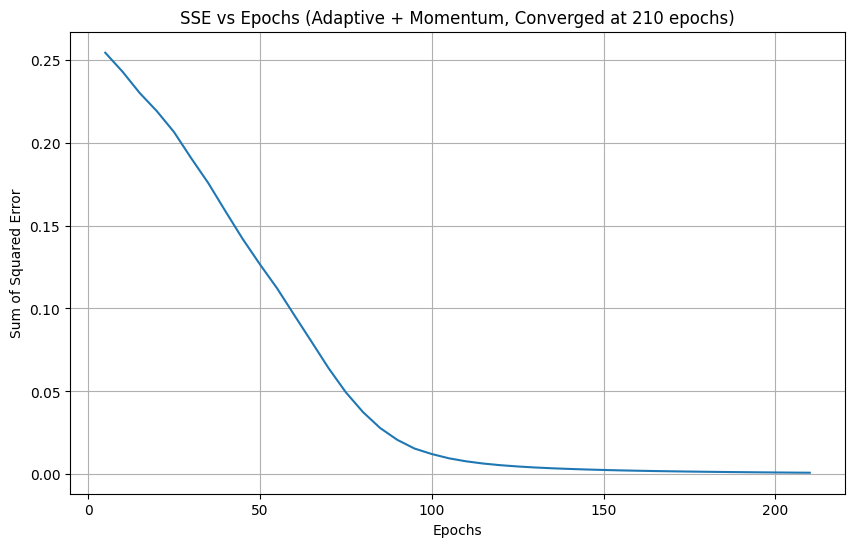

In [30]:
plt.figure(figsize = (10,6))
plt.plot(np.arange(5, epochs_done + 1, 5), losses_adapt_mom)
plt.title(f"SSE vs Epochs (Adaptive + Momentum, Converged at {epochs_done} epochs)")
plt.xlabel("Epochs")
plt.ylabel("Sum of Squared Error")
plt.grid(True)

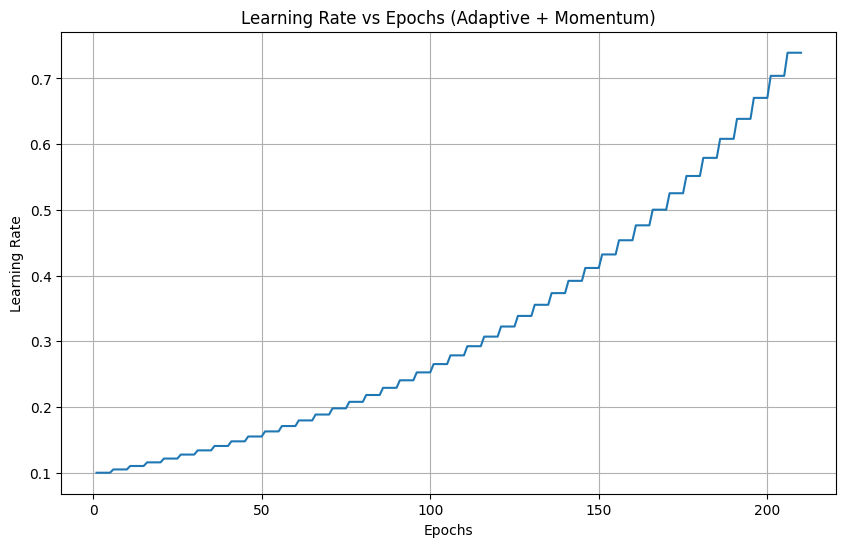

In [31]:
plt.figure(figsize = (10,6))
plt.plot(range(1, len(learning_rates_adapt_mom)+1), learning_rates_adapt_mom)
plt.title("Learning Rate vs Epochs (Adaptive + Momentum)")
plt.xlabel("Epochs")
plt.ylabel("Learning Rate")
plt.grid(True)

# **REPORT**
1. How does a multilayer neural network solve the XOR problem?

 Ans. A multilayer neural network solves the XOR problem by using hidden layers that can learn non-linear decision boundaries. Since the XOR problem is not linearly separable, so a single perceptron cannot solve it but with the hidden layers, the network can transform the input space into a representation where the data becomes linearly separable.

2. In a backpropagation neural network, why are the middle layers called “hidden”?

 Ans. The middle layers in a backpropogation neural network are called "hidden" because the output of the hidden layers is actually hidden in the output data
 i.e they are not directly connected to the external environment. Only the input and output layers interact with the outside world (receiving inputs and producing outputs), while the hidden layers perform internal transformations on the data.

3. How are hyperparameters different from model parameters?

 Ans. A model parameter is a variable of the neural network model which can be estimated by fitting the data to the model such as model weights and biases.
 Hyperparameter is a parameter which is given to the model based on some prior belief. Hyperparameters control the model parameters on iteration.
 Hyperparameters need to be initialized before training the model. Examples include number of epochs, number of hidden layers, activation function, number of hidden units, loss function, learning rates etc

4. Explain the concept of accelerated learning in backpropagation.

 Ans. Acclerated learning in backpropogation uses momentum to dampen oscillations and speed up convergence in gradient descent (learning process).
 Momentum adds a fraction of the previous weight update to the current update which helps the network overcome local minima and flat regions in the error surface, and generally speeds up convergence by maintaining direction through noisy gradients.

5. What are two heuristics applied in adaptive learning rate?

 Ans. Heuristic 1: If the change of the sum of squared errors has the same
 algebraic sign for several consequent epochs, then the learning rate parameter, α, should be increased.

 Heuristic 2: If the algebraic sign of the change of the sum of squared errors alternates for several consequent epochs, then the learning rate parameter, α, should be decreased.